# Разведочный анализ данных

## Обзор проекта
В этой тетради представлен предварительный анализ данных на уровне матчей.   
Цель состоит в том, чтобы понять высокоуровневые закономерности, проверить основные предположения  
и получить информацию, которая может быть полезна для дальнейшего моделирования или анализа игрового баланса.


## Описание датасета
Датасет содержит информацию об отдельных матчах, в том числе:  
- Результаты матчей (победа Radiant / Dire)
- Выбор героев

## 1. Импорты

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
from itertools import combinations

In [2]:
df = pd.read_parquet('matches3.parquet')

## 2. Проверка исходных данных

In [6]:
df.head()

,match_id,radiant_win,radiant_team,dire_team,avg_rank_tier
0,8538577819,False,"[106, 40, 45, 83, 70]","[105, 34, 2, 131, 44]",64
1,8538568019,False,"[138, 14, 73, 57, 40]","[1, 110, 112, 59, 86]",75
2,8538566008,True,"[84, 46, 26, 22, 73]","[60, 128, 1, 105, 14]",75
3,8538565418,False,"[101, 63, 14, 92, 126]","[71, 42, 34, 82, 12]",64
4,8538561719,False,"[7, 28, 35, 91, 8]","[86, 53, 30, 145, 49]",64


## 3. Гипотезы

Прежде чем приступить к анализу данных, мы сформулируем несколько гипотез:

**H1:** Результаты матчей примерно сбалансированы между Radiant и Dire.  
**H2:** Небольшое количество героев доминирует в выборках (распределение по принципу "длинного хвоста").    
**H3:** Существуют заметные перекосы или предубеждения, которые стоит учитывать при моделировании.

## 4. Исследовательский анализ

In [7]:
radiant_counts = Counter([h for heroes in df['radiant_team'] for h in heroes])
dire_counts = Counter([h for heroes in df['dire_team'] for h in heroes])

In [8]:
radiant_counts

Counter({np.int64(14): 15163,
         np.int64(7): 14799,
         np.int64(8): 14022,
         np.int64(26): 13624,
         np.int64(53): 12148,
         np.int64(39): 11722,
         np.int64(86): 11615,
         np.int64(2): 10653,
         np.int64(70): 10413,
         np.int64(128): 10194,
         np.int64(74): 9646,
         np.int64(75): 9371,
         np.int64(104): 9232,
         np.int64(40): 8908,
         np.int64(129): 8378,
         np.int64(97): 8320,
         np.int64(30): 8175,
         np.int64(1): 8042,
         np.int64(11): 8040,
         np.int64(101): 7916,
         np.int64(84): 7755,
         np.int64(31): 7437,
         np.int64(22): 7319,
         np.int64(35): 7285,
         np.int64(21): 7212,
         np.int64(135): 7056,
         np.int64(87): 6783,
         np.int64(27): 6760,
         np.int64(36): 6463,
         np.int64(64): 6402,
         np.int64(123): 6306,
         np.int64(71): 6212,
         np.int64(28): 6188,
         np.int64(63): 6112,
  

In [9]:
dire_counts

Counter({np.int64(7): 14849,
         np.int64(14): 14173,
         np.int64(8): 14169,
         np.int64(26): 13235,
         np.int64(53): 12182,
         np.int64(86): 11975,
         np.int64(39): 11539,
         np.int64(2): 10557,
         np.int64(128): 10374,
         np.int64(70): 10317,
         np.int64(74): 9631,
         np.int64(75): 9447,
         np.int64(104): 9089,
         np.int64(40): 8971,
         np.int64(129): 8547,
         np.int64(97): 8386,
         np.int64(11): 8124,
         np.int64(101): 8115,
         np.int64(30): 7978,
         np.int64(1): 7975,
         np.int64(84): 7696,
         np.int64(31): 7438,
         np.int64(22): 7367,
         np.int64(21): 7203,
         np.int64(35): 7109,
         np.int64(135): 7061,
         np.int64(87): 7014,
         np.int64(27): 6679,
         np.int64(64): 6652,
         np.int64(36): 6520,
         np.int64(28): 6317,
         np.int64(123): 6305,
         np.int64(71): 6103,
         np.int64(54): 6047,
  

In [10]:
data = []
for hero, count in radiant_counts.items():
    data.append({'Hero': hero, 'Team': 'Radiant', 'Picks': count})
for hero, count in dire_counts.items():
    data.append({'Hero': hero, 'Team': 'Dire', 'Picks': count})

In [11]:
df_long = pd.DataFrame(data)

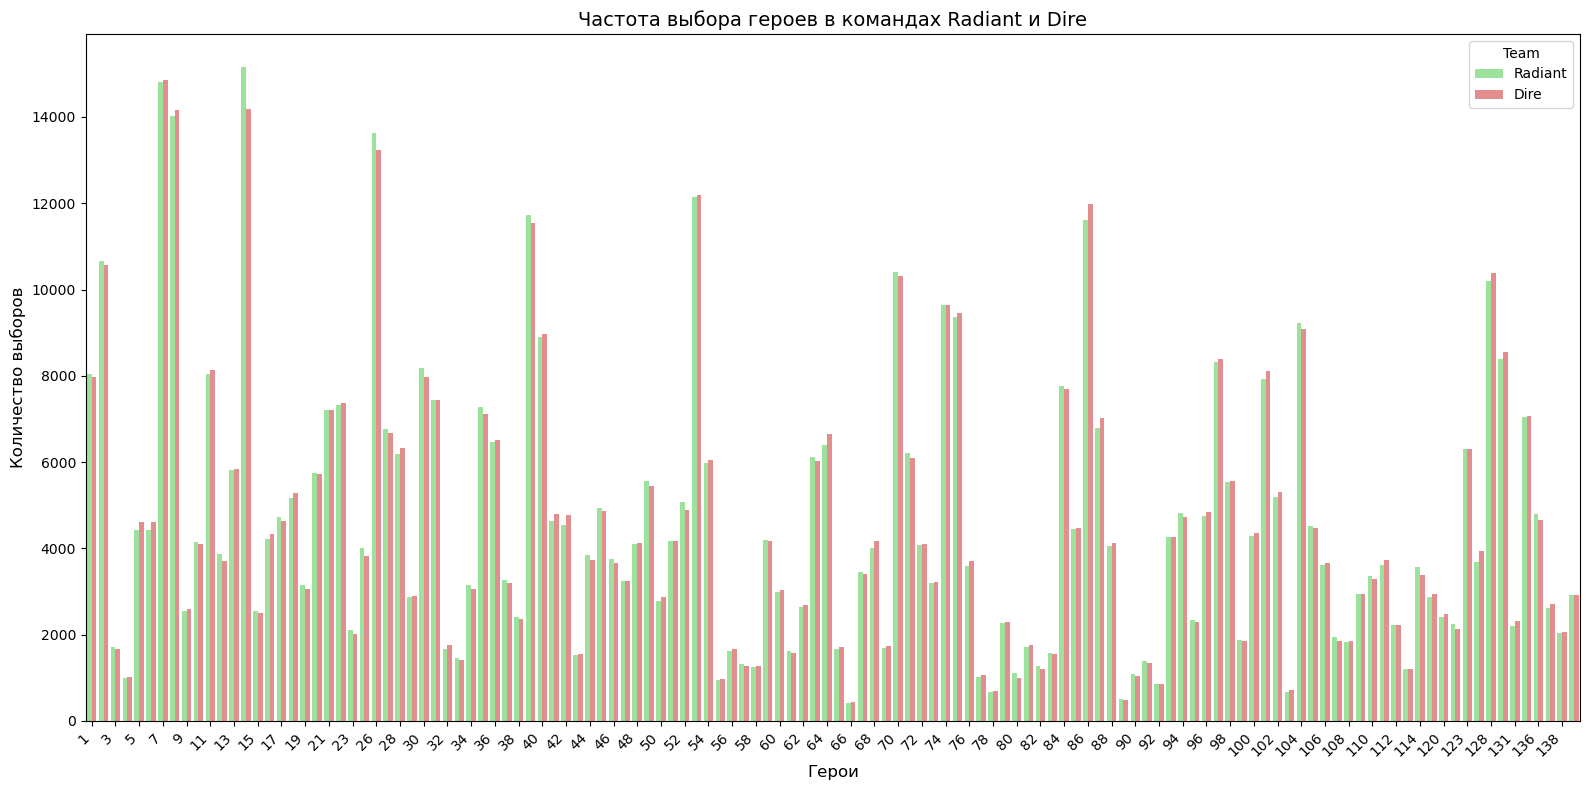

In [12]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_long, x='Hero', y='Picks', hue='Team', 
                 palette={'Radiant': 'lightgreen', 'Dire': 'lightcoral'})

plt.title('Частота выбора героев в командах Radiant и Dire', fontsize=14)
plt.xlabel('Герои', fontsize=12)
plt.ylabel('Количество выборов', fontsize=12)

# Показываем только каждую 2-ю подпись 
n = 2  # Показывать каждую n-ю подпись
ticks = ax.get_xticks()
labels = ax.get_xticklabels()
new_ticks = ticks[::n]
new_labels = labels[::n]

ax.set_xticks(new_ticks)
ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

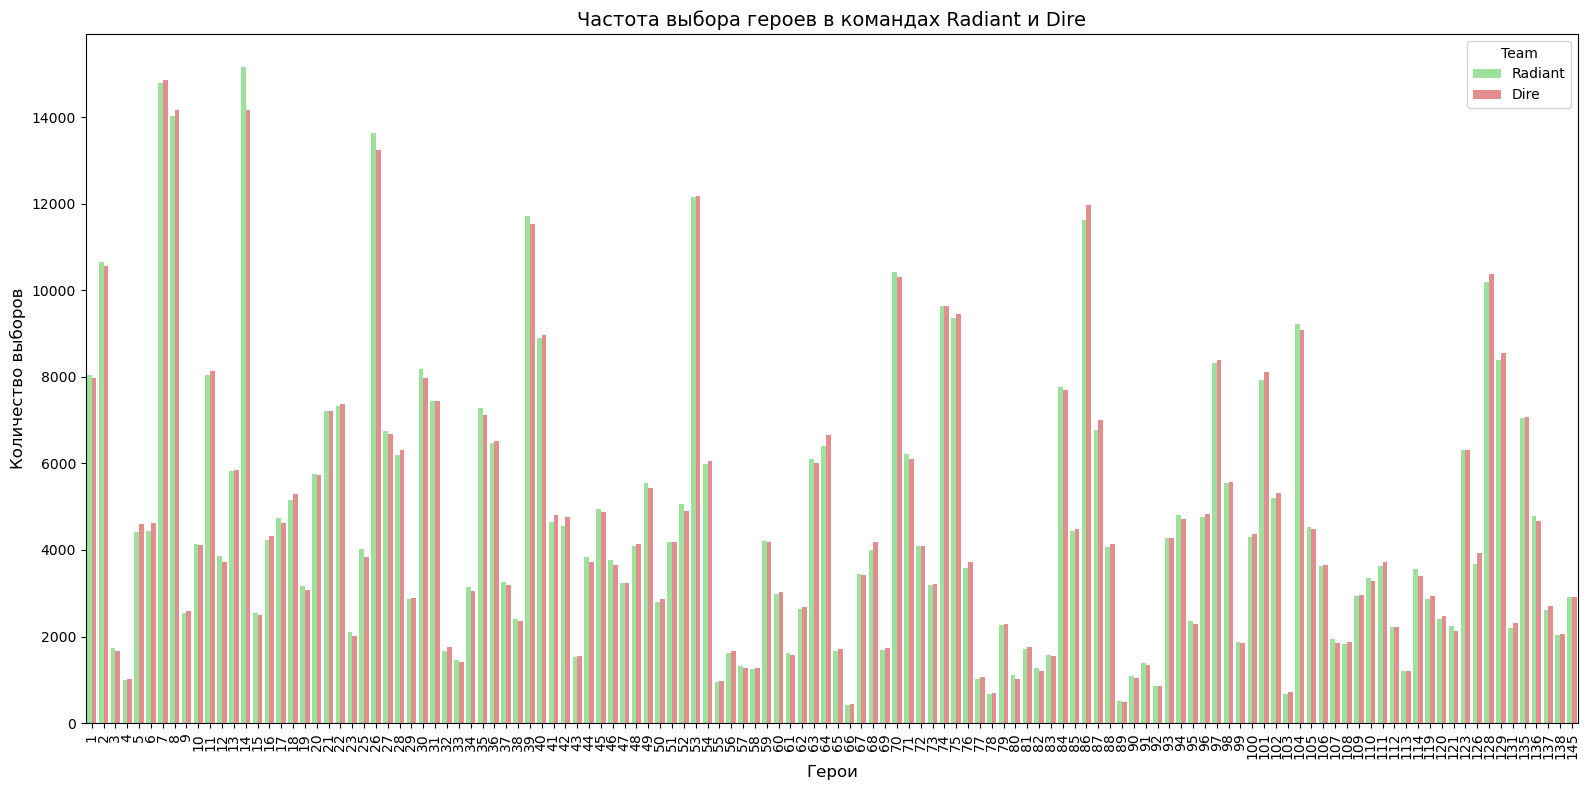

In [13]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_long, x='Hero', y='Picks', hue='Team', 
                 palette={'Radiant': 'lightgreen', 'Dire': 'lightcoral'})

plt.title('Частота выбора героев в командах Radiant и Dire', fontsize=14)
plt.xlabel('Герои', fontsize=12)
plt.ylabel('Количество выборов', fontsize=12)

# Альтернативный способ с tick_params
ax.tick_params(axis='x', rotation=90, labelrotation=90)
plt.tight_layout()
plt.show()

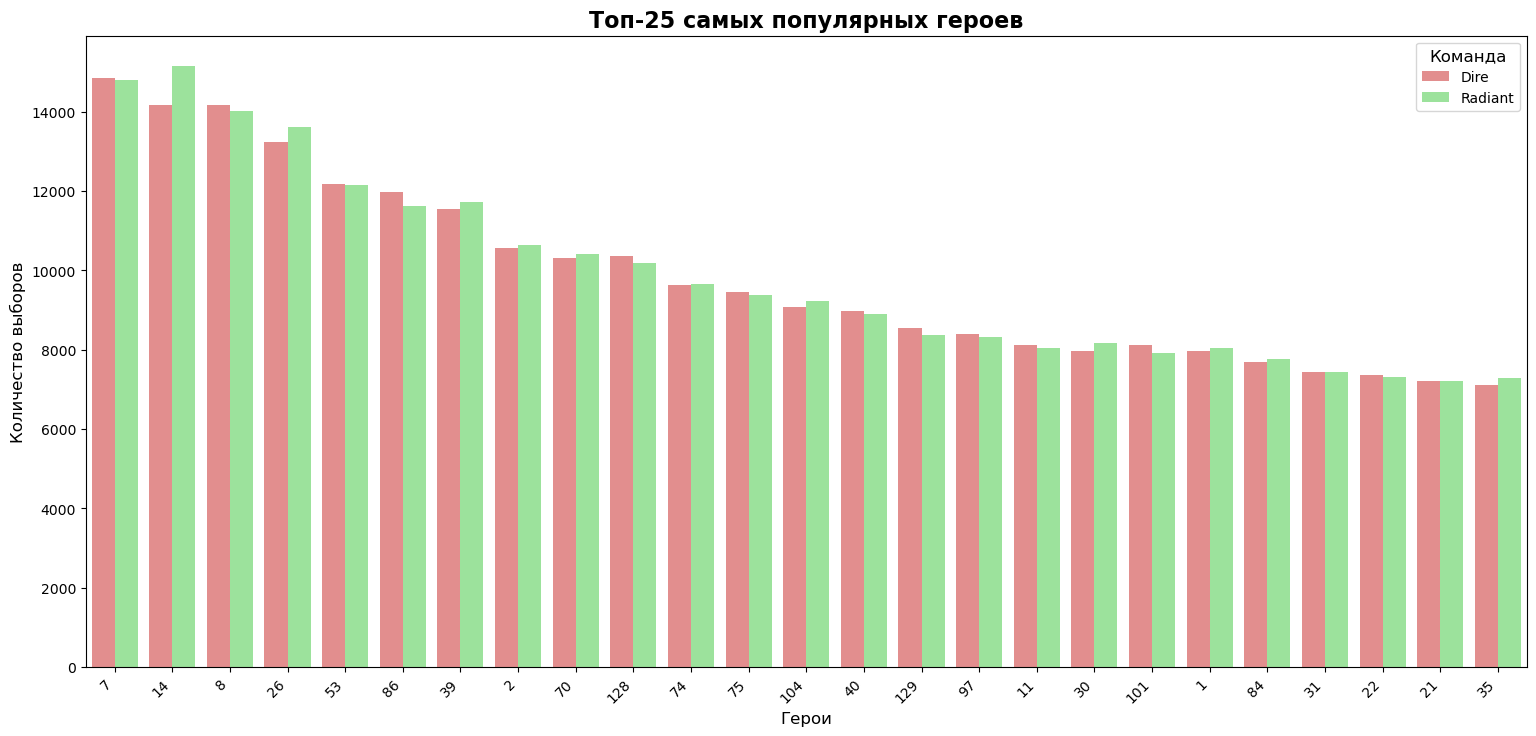

    Hero     Team  Picks
156    7     Dire  14849
17     7  Radiant  14799
138   14     Dire  14173
6     14  Radiant  15163
202    8     Dire  14169
21     8  Radiant  14022
11    26  Radiant  13624
159   26     Dire  13235
32    53  Radiant  12148
143   53     Dire  12182
43    86  Radiant  11615
135   86     Dire  11975
200   39     Dire  11539
89    39  Radiant  11722
128    2     Dire  10557
49     2  Radiant  10653
177   70     Dire  10317
4     70  Radiant  10413
47   128  Radiant  10194
137  128     Dire  10374
206   74     Dire   9631
72    74  Radiant   9646
101   75  Radiant   9371
151   75     Dire   9447
176  104     Dire   9089


In [14]:
# Считаем общее количество выборов для каждого героя и выбираем топ-25
total_picks = df_long.groupby('Hero')['Picks'].sum()
top_heroes = total_picks.nlargest(25).index

# Фильтруем данные только для топ-25 героев
df_top = df_long[df_long['Hero'].isin(top_heroes)]

# Сортируем героев по популярности для правильного порядка на графике
df_top_sorted = df_top.copy()
df_top_sorted['Hero'] = pd.Categorical(df_top_sorted['Hero'], categories=top_heroes, ordered=True)
df_top_sorted = df_top_sorted.sort_values('Hero')

# Создаем график
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_top_sorted, x='Hero', y='Picks', hue='Team', 
                 palette={'Radiant': 'lightgreen', 'Dire': 'lightcoral'})

plt.title('Топ-25 самых популярных героев', fontsize=16, fontweight='bold')
plt.xlabel('Герои', fontsize=12)
plt.ylabel('Количество выборов', fontsize=12)
plt.legend(title='Команда', title_fontsize=12)

# Настраиваем подписи оси X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Увеличиваем отступы для лучшего отображения
plt.tight_layout(pad=3.0)
plt.show()
print(df_top_sorted.head(25))

In [15]:
def calculate_hero_winrates(df):
    """
    Рассчитывает винрейт для каждого героя отдельно в Radiant и Dire
    """
    hero_stats = {}
    
    # Анализируем каждый матч
    for idx, row in df.iterrows():
        radiant_win = row['radiant_win']
        
        # Обрабатываем Radiant команду
        for hero_id in row['radiant_team']:
            if hero_id not in hero_stats:
                hero_stats[hero_id] = {
                    'radiant_games': 0, 
                    'radiant_wins': 0, 
                    'dire_games': 0, 
                    'dire_wins': 0
                }
            hero_stats[hero_id]['radiant_games'] += 1
            if radiant_win:
                hero_stats[hero_id]['radiant_wins'] += 1
        
        # Обрабатываем Dire команду
        for hero_id in row['dire_team']:
            if hero_id not in hero_stats:
                hero_stats[hero_id] = {
                    'radiant_games': 0, 
                    'radiant_wins': 0, 
                    'dire_games': 0, 
                    'dire_wins': 0
                }
            hero_stats[hero_id]['dire_games'] += 1
            if not radiant_win:  # Для Dire победа = radiant_win = False
                hero_stats[hero_id]['dire_wins'] += 1
    
    # Создаем DataFrame с результатами
    results = []
    for hero_id, stats in hero_stats.items():
        total_games = stats['radiant_games'] + stats['dire_games']
        total_wins = stats['radiant_wins'] + stats['dire_wins']
        
        # Добавляем проверку на ноль игр
        radiant_winrate = stats['radiant_wins'] / stats['radiant_games'] if stats['radiant_games'] > 0 else 0
        dire_winrate = stats['dire_wins'] / stats['dire_games'] if stats['dire_games'] > 0 else 0
        total_winrate = total_wins / total_games if total_games > 0 else 0
        
        results.append({
            'hero_id': hero_id,
            'total_games': total_games,
            'total_wins': total_wins,
            'total_winrate': total_winrate,
            'radiant_games': stats['radiant_games'],
            'radiant_wins': stats['radiant_wins'],
            'radiant_winrate': radiant_winrate,
            'dire_games': stats['dire_games'],
            'dire_wins': stats['dire_wins'],
            'dire_winrate': dire_winrate
        })
    
    return pd.DataFrame(results)

# Рассчитываем винрейты
hero_winrates_df = calculate_hero_winrates(df)

# Показываем топ-20 героев по общему винрейту (минимум 100 игр)
min_games = 100
top_heroes_filtered = hero_winrates_df[hero_winrates_df['total_games'] >= min_games].sort_values('total_winrate', ascending=False)

print("Топ-20 героев по винрейту (минимум {} игр):".format(min_games))
print(top_heroes_filtered[['hero_id', 'total_winrate', 'total_games', 'radiant_winrate', 'dire_winrate']].head(25).to_string(index=False))

# Дополнительная проверка данных
#print(f"\nОбщая статистика:")
#print(f"Всего уникальных героев: {len(hero_winrates_df)}")
#print(f"Героев с >= {min_games} играми: {len(top_heroes_filtered)}")
#print(f"Максимальное количество игр у героя: {hero_winrates_df['total_games'].max()}")

Топ-20 героев по винрейту (минимум 100 игр):
 hero_id  total_winrate  total_games  radiant_winrate  dire_winrate
      82       0.565375         2478         0.596063      0.533113
      92       0.552770         1715         0.587209      0.518129
     111       0.547794         7344         0.573951      0.522312
       8       0.547622        28191         0.581372      0.514221
      20       0.543039        11478         0.580421      0.505500
      77       0.539310         2086         0.574927      0.505164
      52       0.535388         9961         0.570667      0.498876
      50       0.535134         5664         0.565186      0.505919
      78       0.534934         1374         0.559880      0.511331
      61       0.534731         3196         0.571341      0.496815
      88       0.531220         8200         0.572835      0.490329
      54       0.530860        12022         0.569707      0.492476
     102       0.529714        10517         0.561899      0.498213
   

In [16]:
def calculate_top_heroes_winrate(df_top, df_matches):
    """
    Рассчитывает винрейт для топ-25 популярных героев на основе агрегированных данных
    
    Parameters:
    df_top (DataFrame): DataFrame с топ героями ['Hero', 'Team', 'Picks']
    df_matches (DataFrame): Исходный DataFrame с матчами
    """
    # Получаем список уникальных героев из топ-25
    top_heroes = df_top['Hero'].unique()
    
    # Создаем словарь для статистики
    hero_stats = {}
    
    # Инициализируем статистику для каждого героя
    for hero_id in top_heroes:
        hero_stats[hero_id] = {
            'radiant_games': 0, 
            'radiant_wins': 0, 
            'dire_games': 0, 
            'dire_wins': 0
        }
    
    # Анализируем каждый матч в исходном DataFrame
    for idx, match in df_matches.iterrows():
        radiant_win = match['radiant_win']
        
        # Обрабатываем Radiant команду
        for hero_id in match['radiant_team']:
            if hero_id in top_heroes:
                hero_stats[hero_id]['radiant_games'] += 1
                if radiant_win:
                    hero_stats[hero_id]['radiant_wins'] += 1
        
        # Обрабатываем Dire команду
        for hero_id in match['dire_team']:
            if hero_id in top_heroes:
                hero_stats[hero_id]['dire_games'] += 1
                if not radiant_win:
                    hero_stats[hero_id]['dire_wins'] += 1
    
    # Создаем DataFrame с результатами
    results = []
    for hero_id, stats in hero_stats.items():
        total_games = stats['radiant_games'] + stats['dire_games']
        total_wins = stats['radiant_wins'] + stats['dire_wins']
        
        # Рассчитываем винрейты с проверкой деления на ноль
        radiant_winrate = stats['radiant_wins'] / stats['radiant_games'] if stats['radiant_games'] > 0 else 0
        dire_winrate = stats['dire_wins'] / stats['dire_games'] if stats['dire_games'] > 0 else 0
        total_winrate = total_wins / total_games if total_games > 0 else 0
        
        results.append({
            'hero_id': hero_id,
            'total_games': total_games,
            'total_wins': total_wins,
            'total_winrate': total_winrate,
            'radiant_games': stats['radiant_games'],
            'radiant_wins': stats['radiant_wins'],
            'radiant_winrate': radiant_winrate,
            'dire_games': stats['dire_games'],
            'dire_wins': stats['dire_wins'],
            'dire_winrate': dire_winrate
        })
    
    winrate_df = pd.DataFrame(results)
    
    # Сортируем по винрейту
    winrate_df = winrate_df.sort_values('total_winrate', ascending=False)
    
    # Выводим результаты
    print("\nВинрейт топ-{} популярных героев:".format(len(top_heroes)))
    print("=" * 80)
    
    display_df = winrate_df[['hero_id', 'total_winrate', 'total_games', 
                           'radiant_winrate', 'dire_winrate']].copy()
    
    # Форматируем проценты
    display_df['total_winrate'] = (display_df['total_winrate'] * 100).round(2)
    display_df['radiant_winrate'] = (display_df['radiant_winrate'] * 100).round(2)
    display_df['dire_winrate'] = (display_df['dire_winrate'] * 100).round(2)
    
    display_df = display_df.rename(columns={
        'hero_id': 'Hero ID',
        'total_winrate': 'Winrate %',
        'total_games': 'Total Games',
        'radiant_winrate': 'Radiant WR %',
        'dire_winrate': 'Dire WR %'
    })
    
    print(display_df.to_string(index=False))
    return winrate_df

# Использование:
top_heroes_winrate = calculate_top_heroes_winrate(df_top_sorted, df)

top_heroes_sorted_by_games = top_heroes_winrate.sort_values('total_games', ascending=False)

print("Топ-25 популярных героев (упорядочено по количеству игр):")
print("=" * 80)

display_sorted = top_heroes_sorted_by_games[['hero_id', 'total_winrate', 'total_games', 
                                           'radiant_winrate', 'dire_winrate']].copy()

# Форматируем проценты
display_sorted['total_winrate'] = (display_sorted['total_winrate'] * 100).round(2)
display_sorted['radiant_winrate'] = (display_sorted['radiant_winrate'] * 100).round(2)
display_sorted['dire_winrate'] = (display_sorted['dire_winrate'] * 100).round(2)

display_sorted = display_sorted.rename(columns={
    'hero_id': 'Hero ID',
    'total_winrate': 'Winrate %',
    'total_games': 'Total Games',
    'radiant_winrate': 'Radiant WR %',
    'dire_winrate': 'Dire WR %'
})

print(display_sorted.to_string(index=False))

# Дополнительная информация о распределении
#print(f"\nСтатистика по количеству игр:")
#print(f"Максимальное количество игр: {top_heroes_sorted_by_games['total_games'].max()}")
#print(f"Минимальное количество игр: {top_heroes_sorted_by_games['total_games'].min()}")
#print(f"Среднее количество игр: {top_heroes_sorted_by_games['total_games'].mean():.0f}")


Винрейт топ-25 популярных героев:
 Hero ID  Winrate %  Total Games  Radiant WR %  Dire WR %
       8      54.76        28191         58.14      51.42
      31      52.91        14875         56.21      49.61
     104      52.14        18321         55.59      48.64
      70      51.89        20730         55.95      47.79
      40      51.65        17879         55.55      47.79
      14      51.14        29336         54.98      47.03
      75      51.11        18818         54.86      47.39
      30      51.02        16153         54.90      47.04
     101      50.83        16031         54.65      47.10
      84      50.53        15451         53.91      47.13
      39      50.52        23261         54.25      46.74
       2      50.48        21210         53.91      47.02
       7      50.24        29648         53.94      46.56
      22      50.18        14686         53.91      46.46
     128      50.17        20568         53.91      46.48
       1      50.07        16017     

C:\Users\Kshusha\AppData\Local\Temp\ipykernel_16800\1054906658.py:53: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  line = ax2.plot(x_pos, plot_df_sorted['total_winrate_percent'],
C:\Users\Kshusha\AppData\Local\Temp\ipykernel_16800\1054906658.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  line = ax2.plot(x_pos, plot_df_sorted['total_winrate_percent'],


Статистика по топ-25 популярным героям:
Общее количество матчей: 493835
Средний винрейт: 50.29%
Герой с наивысшим винрейтом: 8 (54.8%)
Герой с наименьшим винрейтом: 35 (47.0%)


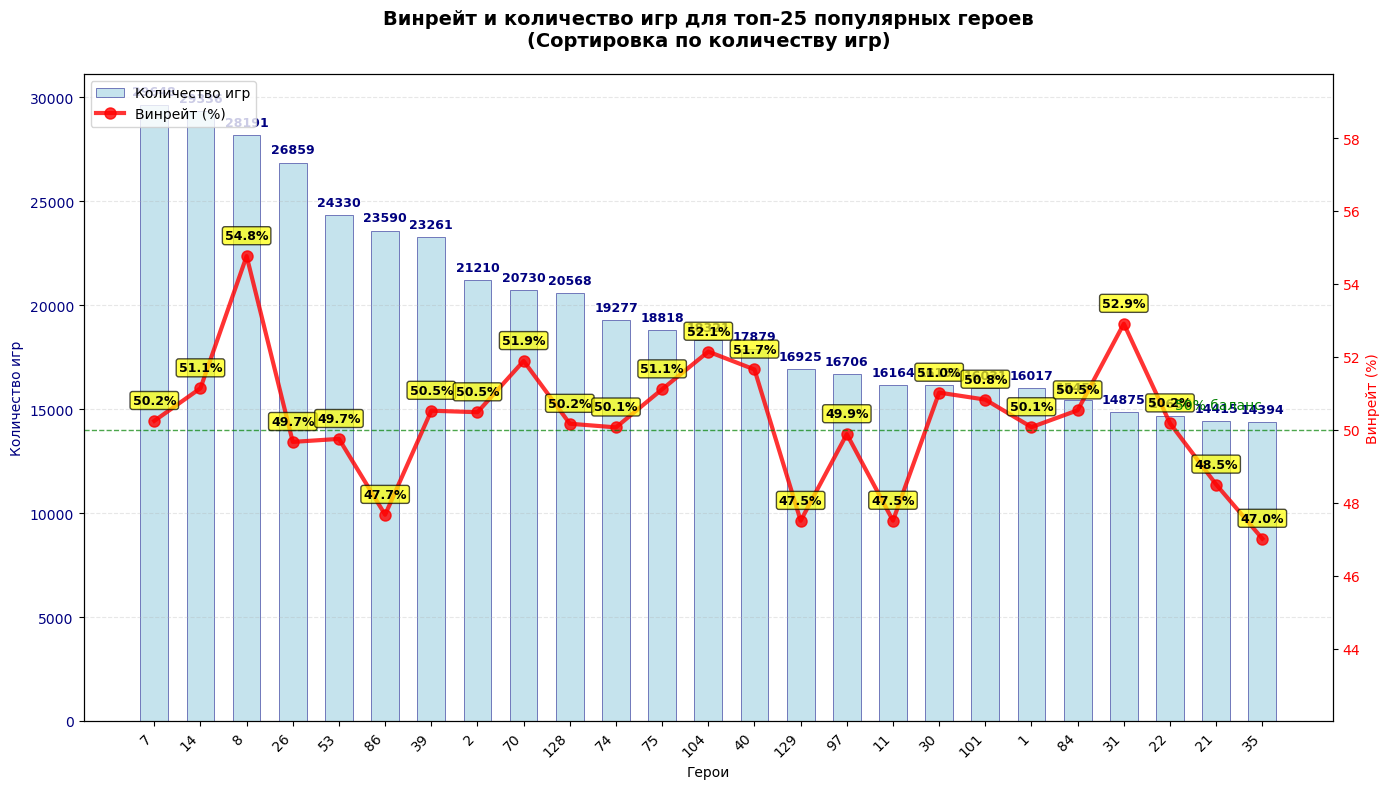

In [21]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_winrate_vs_games(winrate_df, df_top_sorted, top_n=25, figsize=(14, 8)):
    """
    Визуализирует винрейт и количество игр популярных героев на одной диаграмме
    
    Parameters:
    winrate_df (DataFrame): DataFrame с результатами винрейтов от calculate_top_heroes_winrate
    df_top_sorted (DataFrame): DataFrame с топ героями для получения названий
    top_n (int): Количество героев для отображения
    figsize (tuple): Размер фигуры
    """
    
    # Создаем словарь для соответствия ID героя и его названия
    hero_names = dict(zip(df_top_sorted['Hero'], df_top_sorted['Hero']))
    
    # Подготовка данных
    plot_df = winrate_df.copy()
    plot_df['hero_name'] = plot_df['hero_id'].map(hero_names)
    plot_df['total_winrate_percent'] = plot_df['total_winrate'] * 100
    
    # Сортируем по популярности (количеству игр)
    plot_df_sorted = plot_df.sort_values('total_games', ascending=False).head(top_n)
    
    # Создаем фигуру и оси
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Настройки для столбцов
    x_pos = np.arange(len(plot_df_sorted))
    width = 0.6
    
    # Столбцы для количества игр (ось Y слева)
    bars = ax1.bar(x_pos, plot_df_sorted['total_games'], width, 
                   alpha=0.7, color='lightblue', edgecolor='navy', linewidth=0.5,
                   label='Количество игр')
    
    ax1.set_xlabel('Герои')
    ax1.set_ylabel('Количество игр', color='navy')
    ax1.tick_params(axis='y', labelcolor='navy')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(plot_df_sorted['hero_name'], rotation=45, ha='right')
    
    # Добавляем значения количества игр на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(plot_df_sorted['total_games'])*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, color='navy', fontweight='bold')
    
    # Создаем вторую ось Y для винрейта (справа)
    ax2 = ax1.twinx()
    
    # Линия для винрейта
    line = ax2.plot(x_pos, plot_df_sorted['total_winrate_percent'], 
                   'ro-', linewidth=3, markersize=8, marker='o', 
                   label='Винрейт (%)', color='red', alpha=0.8)
    
    ax2.set_ylabel('Винрейт (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim([max(0, plot_df_sorted['total_winrate_percent'].min() - 5), 
                  min(100, plot_df_sorted['total_winrate_percent'].max() + 5)])
    
    # Добавляем значения винрейта на точках
    for i, winrate in enumerate(plot_df_sorted['total_winrate_percent']):
        ax2.annotate(f'{winrate:.1f}%', 
                    (x_pos[i], winrate),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', va='bottom', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.7),
                    fontsize=9)
    
    # Добавляем горизонтальную линию на уровне 50% (баланс)
    ax2.axhline(y=50, color='green', linestyle='--', alpha=0.7, linewidth=1)
    ax2.text(len(plot_df_sorted) - 1, 50.5, '50% баланс', 
             ha='right', va='bottom', color='green', fontsize=10)
    
    # Объединяем легенды
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Заголовок и сетка
    plt.title(f'Винрейт и количество игр для топ-{top_n} популярных героев\n'
              f'(Сортировка по количеству игр)', 
              fontsize=14, fontweight='bold', pad=20)
    
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Настройки внешнего вида
    plt.tight_layout()
    
    # Выводим дополнительную информацию
    avg_winrate = plot_df_sorted['total_winrate_percent'].mean()
    total_matches = plot_df_sorted['total_games'].sum()
    
    print(f"Статистика по топ-{top_n} популярным героям:")
    print(f"Общее количество матчей: {total_matches}")
    print(f"Средний винрейт: {avg_winrate:.2f}%")
    print(f"Герой с наивысшим винрейтом: {plot_df_sorted.loc[plot_df_sorted['total_winrate_percent'].idxmax(), 'hero_name']} "
          f"({plot_df_sorted['total_winrate_percent'].max():.1f}%)")
    print(f"Герой с наименьшим винрейтом: {plot_df_sorted.loc[plot_df_sorted['total_winrate_percent'].idxmin(), 'hero_name']} "
          f"({plot_df_sorted['total_winrate_percent'].min():.1f}%)")
    
    plt.show()

# Альтернативный вариант с горизонтальными столбцами
def visualize_winrate_vs_games_horizontal(winrate_df, df_top_sorted, top_n=15, figsize=(14, 10)):
    """
    Горизонтальная версия визуализации винрейта и количества игр
    """
    
    hero_names = dict(zip(df_top_sorted['Hero'], df_top_sorted['Hero']))
    plot_df = winrate_df.copy()
    plot_df['hero_name'] = plot_df['hero_id'].map(hero_names)
    plot_df['total_winrate_percent'] = plot_df['total_winrate'] * 100
    
    # Сортируем по количеству игр
    plot_df_sorted = plot_df.sort_values('total_games', ascending=True).tail(top_n)
    
    fig, ax1 = plt.subplots(figsize=figsize)
    
    y_pos = np.arange(len(plot_df_sorted))
    
    # Горизонтальные столбцы для количества игр
    bars = ax1.barh(y_pos, plot_df_sorted['total_games'], 
                   alpha=0.7, color='lightblue', edgecolor='navy', linewidth=0.5,
                   label='Количество игр')
    
    ax1.set_ylabel('Герои')
    ax1.set_xlabel('Количество игр', color='navy')
    ax1.tick_params(axis='x', labelcolor='navy')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(plot_df_sorted['hero_name'])
    
    # Вторая ось для винрейта
    ax2 = ax1.twiny()
    
    # Точки для винрейта
    scatter = ax2.scatter(plot_df_sorted['total_winrate_percent'], y_pos,
                         s=100, color='red', alpha=0.8, marker='D',
                         label='Винрейт (%)', edgecolors='black', linewidth=1)
    
    ax2.set_xlabel('Винрейт (%)', color='red')
    ax2.tick_params(axis='x', labelcolor='red')
    ax2.set_xlim([max(0, plot_df_sorted['total_winrate_percent'].min() - 5), 
                  min(100, plot_df_sorted['total_winrate_percent'].max() + 5)])
    
    # Вертикальная линия на уровне 50%
    ax2.axvline(x=50, color='green', linestyle='--', alpha=0.7, linewidth=1)
    
    # Добавляем значения
    for i, (games, winrate) in enumerate(zip(plot_df_sorted['total_games'], plot_df_sorted['total_winrate_percent'])):
        ax1.text(games + max(plot_df_sorted['total_games'])*0.01, i, 
                f'{int(games)}', va='center', fontsize=9, color='navy', fontweight='bold')
        ax2.text(winrate, i, f' {winrate:.1f}%', va='center', fontsize=9, 
                color='red', fontweight='bold', bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8))
    
    plt.title(f'Винрейт и количество игр для топ-{top_n} популярных героев\n'
              f'(Сортировка по количеству игр)', 
              fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

# Пример использования:
# Основная версия
visualize_winrate_vs_games(top_heroes_winrate, df_top_sorted, top_n=25)

# Горизонтальная версия (альтернатива)
# visualize_winrate_vs_games_horizontal(top_heroes_winrate, df_top_sorted, top_n=15)

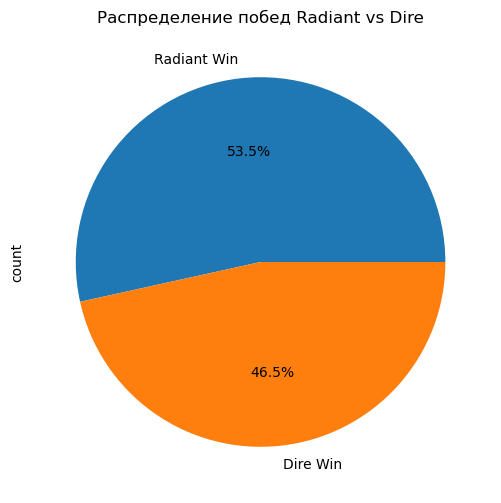

Винрейт Radiant: 53.45%


In [22]:
#
plt.figure(figsize=(8, 6))
df['radiant_win'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Radiant Win', 'Dire Win'])
plt.title('Распределение побед Radiant vs Dire')
plt.show()

# Процент побед Radiant
radiant_win_rate = df['radiant_win'].mean()
print(f"Винрейт Radiant: {radiant_win_rate:.2%}")

C:\Users\Kshusha\AppData\Local\Temp\ipykernel_16800\1902169075.py:70: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro-" (-> marker='o'). The keyword argument will take precedence.
  line = ax2.plot(x_pos, plot_df_sorted['popularity'],
C:\Users\Kshusha\AppData\Local\Temp\ipykernel_16800\1902169075.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  line = ax2.plot(x_pos, plot_df_sorted['popularity'],


Статистика по топ-25 героям по винрейту:
Герой                Винрейт      Игры       Популярность
8.0                    54.8%     28191.0        5.71%
31.0                   52.9%     14875.0        3.01%
104.0                  52.1%     18321.0        3.71%
70.0                   51.9%     20730.0        4.20%
40.0                   51.7%     17879.0        3.62%
14.0                   51.1%     29336.0        5.94%
75.0                   51.1%     18818.0        3.81%
30.0                   51.0%     16153.0        3.27%
101.0                  50.8%     16031.0        3.25%
84.0                   50.5%     15451.0        3.13%
39.0                   50.5%     23261.0        4.71%
2.0                    50.5%     21210.0        4.29%
7.0                    50.2%     29648.0        6.00%
22.0                   50.2%     14686.0        2.97%
128.0                  50.2%     20568.0        4.16%
1.0                    50.1%     16017.0        3.24%
74.0                   50.1%     1927

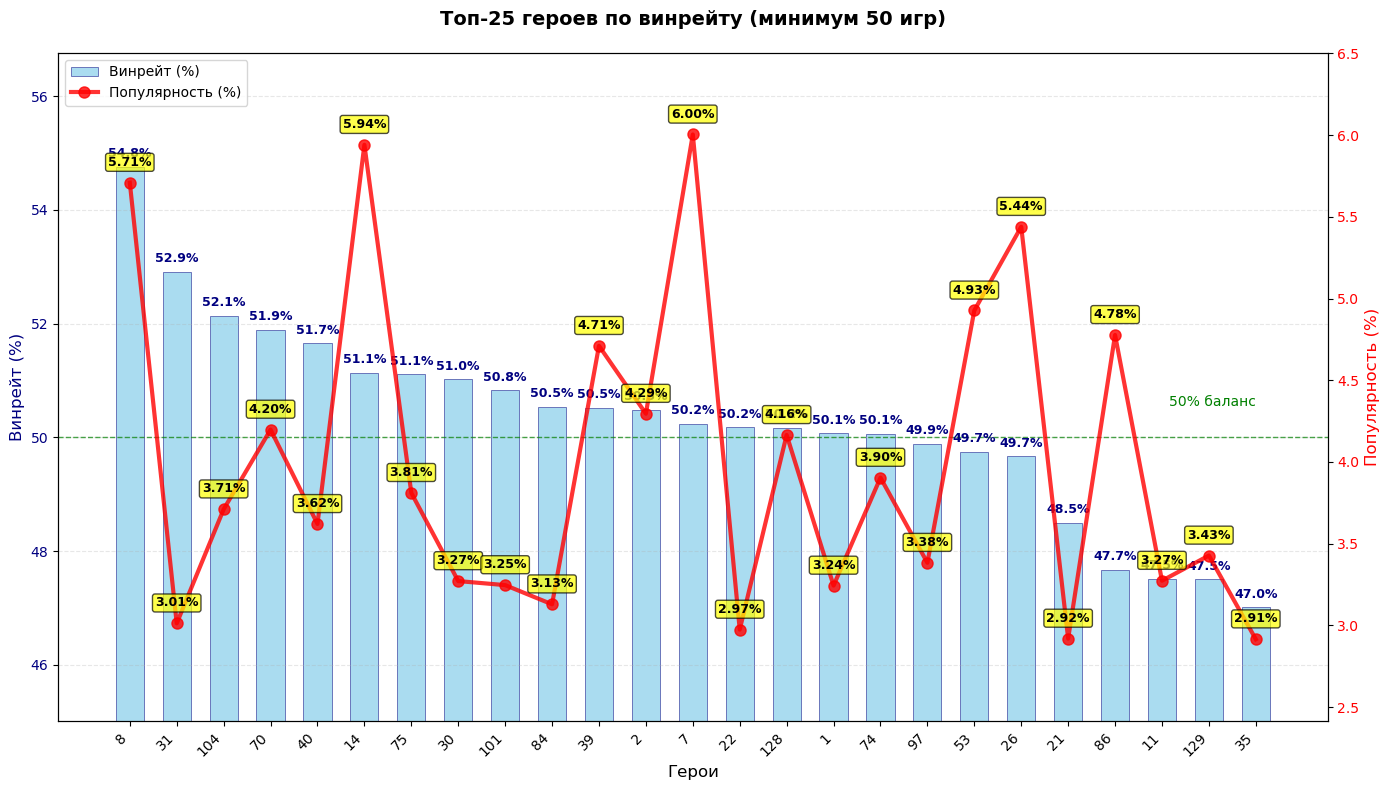

,hero_id,total_games,total_wins,total_winrate,radiant_games,radiant_wins,radiant_winrate,dire_games,dire_wins,dire_winrate,hero_name,total_winrate_percent,popularity
2,8,28191,15438,0.547622,14022,8152,0.581372,14169,7286,0.514221,8,54.762158,5.708587
21,31,14875,7870,0.529076,7437,4180,0.562055,7438,3690,0.496101,31,52.907563,3.012140
12,104,18321,9553,0.521424,9232,5132,0.555893,9089,4421,0.486412,104,52.142350,3.709944
8,70,20730,10756,0.518862,10413,5826,0.559493,10317,4930,0.477852,70,51.886155,4.197758
13,40,17879,9235,0.516528,8908,4948,0.555456,8971,4287,0.477873,40,51.652777,3.620440
1,14,29336,15002,0.511385,15163,8336,0.549759,14173,6666,0.470331,14,51.138533,5.940446
11,75,18818,9618,0.511106,9371,5141,0.548607,9447,4477,0.473907,75,51.110639,3.810585
17,30,16153,8241,0.510184,8175,4488,0.548991,7978,3753,0.470419,30,51.018387,3.270931
18,101,16031,8148,0.508265,7916,4326,0.546488,8115,3822,0.470980,101,50.826524,3.246226
20,84,15451,7808,0.505339,7755,4181,0.539136,7696,3627,0.471284,84,50.533946,3.128778


In [32]:
def visualize_top_heroes_winrate(winrate_df, df_top_sorted, top_n=25, min_games=50, figsize=(14, 8)):
    """
    Визуализирует топ-25 героев по винрейту с популярностью
    
    Parameters:
    winrate_df (DataFrame): DataFrame с результатами винрейтов
    df_top_sorted (DataFrame): DataFrame с топ героями для получения названий
    top_n (int): Количество героев для отображения
    min_games (int): Минимальное количество игр для включения
    figsize (tuple): Размер фигуры
    """
    
    # Создаем словарь для соответствия ID героя и его названия
    hero_names = dict(zip(df_top_sorted['Hero'], df_top_sorted['Hero']))
    
    # Подготовка данных
    plot_df = winrate_df.copy()
    plot_df['hero_name'] = plot_df['hero_id'].map(hero_names)
    plot_df['total_winrate_percent'] = plot_df['total_winrate'] * 100
    
    # Фильтруем по минимальному количеству игр
    plot_df_filtered = plot_df[plot_df['total_games'] >= min_games]
    
    # Сортируем по винрейту и берем топ-N
    plot_df_sorted = plot_df_filtered.sort_values('total_winrate', ascending=False).head(top_n)
    
    # Создаем фигуру и оси
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Настройки для столбцов
    x_pos = np.arange(len(plot_df_sorted))
    width = 0.6
    
    # СТОЛБЦЫ ДЛЯ ВИНРЕЙТА (ось Y слева) - СИНИЕ
    bars = ax1.bar(x_pos, plot_df_sorted['total_winrate_percent'], width, 
                   alpha=0.7, color='skyblue', edgecolor='navy', linewidth=0.5,
                   label='Винрейт (%)')
    
    ax1.set_xlabel('Герои', fontsize=12)
    ax1.set_ylabel('Винрейт (%)', color='navy', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='navy')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(plot_df_sorted['hero_name'], rotation=45, ha='right', fontsize=10)
    
    # Автоматически устанавливаем диапазон для оси винрейта
    winrate_min = plot_df_sorted['total_winrate_percent'].min()
    winrate_max = plot_df_sorted['total_winrate_percent'].max()
    ax1.set_ylim([max(40, winrate_min - 2), min(70, winrate_max + 2)])
    
    # Добавляем значения винрейта на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.01,
                f'{height:.1f}%', ha='center', va='bottom', 
                fontsize=9, color='navy', fontweight='bold')
    
    # Добавляем горизонтальную линию на уровне 50%
    ax1.axhline(y=50, color='green', linestyle='--', alpha=0.7, linewidth=1)
    ax1.text(len(plot_df_sorted) - 1, 50.5, '50% баланс', 
             ha='right', va='bottom', color='green', fontsize=10)
    
    # Создаем вторую ось Y для ПОПУЛЯРНОСТИ (справа) - КРАСНАЯ ЛИНИЯ
    ax2 = ax1.twinx()
    
    # Расчет популярности (процент игр от общего числа)
    total_games = winrate_df['total_games'].sum()
    plot_df_sorted['popularity'] = plot_df_sorted['total_games'] / total_games * 100
    
    # ЛИНИЯ ДЛЯ ПОПУЛЯРНОСТИ - КРАСНАЯ
    line = ax2.plot(x_pos, plot_df_sorted['popularity'], 
                   'ro-', linewidth=3, markersize=8, marker='o', 
                   label='Популярность (%)', color='red', alpha=0.8)
    
    ax2.set_ylabel('Популярность (%)', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Автоматически устанавливаем лимиты для оси популярности
    pop_min = plot_df_sorted['popularity'].min()
    pop_max = plot_df_sorted['popularity'].max()
    ax2.set_ylim([max(0, pop_min - 0.5), pop_max + 0.5])
    
    # Добавляем значения популярности на точках
    for i, popularity in enumerate(plot_df_sorted['popularity']):
        ax2.annotate(f'{popularity:.2f}%', 
                    (x_pos[i], popularity),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', va='bottom', fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.7),
                    fontsize=9)
    
    # Объединяем легенды
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    # Заголовок и сетка
    plt.title(f'Топ-{top_n} героев по винрейту (минимум {min_games} игр)', 
              fontsize=14, fontweight='bold', pad=20)
    
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Настройки внешнего вида
    plt.tight_layout()
    
    # Выводим статистику
    print(f"Статистика по топ-{top_n} героям по винрейту:")
    print("=" * 70)
    print(f"{'Герой':<20} {'Винрейт':<12} {'Игры':<10} {'Популярность':<12}")
    print("=" * 70)
    
    for _, row in plot_df_sorted.iterrows():
        print(f"{row['hero_name']:<20} {row['total_winrate_percent']:>6.1f}%     "
              f"{row['total_games']:<10} {row['popularity']:>8.2f}%")
    
    print("=" * 70)    
    plt.show()
    
    return plot_df_sorted

# Использование функции
visualize_top_heroes_winrate(top_heroes_winrate, df_top_sorted, top_n=25, min_games=50)

In [35]:
# Самые популярные пары героев в одной команде
popular_pairs = Counter()
for team in df['radiant_team']:
    for pair in combinations(sorted(team), 2):
        popular_pairs[pair] += 1
for team in df['dire_team']:
    for pair in combinations(sorted(team), 2):
        popular_pairs[pair] += 1

print("Топ-10 самых популярных пар героев:")
for pair, count in popular_pairs.most_common(10):
    print(f"Герои {pair}: {count} матчей")

Топ-10 самых популярных пар героев:
Герои (np.int64(8), np.int64(14)): 3458 матчей
Герои (np.int64(7), np.int64(8)): 3454 матчей
Герои (np.int64(8), np.int64(26)): 3338 матчей
Герои (np.int64(8), np.int64(86)): 2881 матчей
Герои (np.int64(7), np.int64(26)): 2813 матчей
Герои (np.int64(8), np.int64(39)): 2807 матчей
Герои (np.int64(7), np.int64(14)): 2789 матчей
Герои (np.int64(7), np.int64(53)): 2725 матчей
Герои (np.int64(14), np.int64(53)): 2717 матчей
Герои (np.int64(14), np.int64(39)): 2668 матчей


In [36]:
from collections import Counter
from itertools import combinations

# Подсчет популярности пар
popular_pairs = Counter()
for team in df['radiant_team']:
    for pair in combinations(sorted(team), 2):
        popular_pairs[pair] += 1
for team in df['dire_team']:
    for pair in combinations(sorted(team), 2):
        popular_pairs[pair] += 1

# Подсчет винрейта для пар
pair_winrates = {}

for idx, match in df.iterrows():
    radiant_win = match['radiant_win']
    radiant_team = set(match['radiant_team'])
    dire_team = set(match['dire_team'])
    
    # Проверяем все возможные пары в Radiant
    for pair in combinations(sorted(radiant_team), 2):
        if pair not in pair_winrates:
            pair_winrates[pair] = {'games': 0, 'wins': 0}
        pair_winrates[pair]['games'] += 1
        if radiant_win:
            pair_winrates[pair]['wins'] += 1
    
    # Проверяем все возможные пары в Dire
    for pair in combinations(sorted(dire_team), 2):
        if pair not in pair_winrates:
            pair_winrates[pair] = {'games': 0, 'wins': 0}
        pair_winrates[pair]['games'] += 1
        if not radiant_win:
            pair_winrates[pair]['wins'] += 1

# Выводим топ-10 самых популярных пар с винрейтом
print("Топ-10 самых популярных пар героев с винрейтом:")
print("=" * 60)

results = []
for pair, count in popular_pairs.most_common(10):
    if pair in pair_winrates:
        stats = pair_winrates[pair]
        winrate = (stats['wins'] / stats['games'] * 100) if stats['games'] > 0 else 0
        results.append({
            'pair': pair,
            'games': stats['games'],
            'wins': stats['wins'],
            'winrate': winrate,
            'total_picks': count
        })

# Сортируем по популярности и выводим
for result in results:
    print(f"Герои {result['pair']}: {result['total_picks']} выборов, {result['games']} игр, {result['winrate']:.2f}% винрейт")

# Дополнительно: топ-10 пар по винрейту (минимум 50 игр)
print("\n" + "=" * 60)
print("Топ-10 пар по винрейту (минимум 50 игр):")
print("=" * 60)

high_winrate_pairs = []
for pair, stats in pair_winrates.items():
    if stats['games'] >= 50:
        winrate = (stats['wins'] / stats['games'] * 100) if stats['games'] > 0 else 0
        high_winrate_pairs.append({
            'pair': pair,
            'games': stats['games'],
            'wins': stats['wins'],
            'winrate': winrate
        })

# Сортируем по винрейту
high_winrate_pairs.sort(key=lambda x: x['winrate'], reverse=True)

for result in high_winrate_pairs[:10]:
    print(f"Герои {result['pair']}: {result['winrate']:.2f}% винрейт ({result['games']} игр, {result['wins']} побед)")

Топ-10 самых популярных пар героев с винрейтом:
Герои (np.int64(8), np.int64(14)): 3458 выборов, 3458 игр, 56.13% винрейт
Герои (np.int64(7), np.int64(8)): 3454 выборов, 3454 игр, 54.98% винрейт
Герои (np.int64(8), np.int64(26)): 3338 выборов, 3338 игр, 55.24% винрейт
Герои (np.int64(8), np.int64(86)): 2881 выборов, 2881 игр, 53.21% винрейт
Герои (np.int64(7), np.int64(26)): 2813 выборов, 2813 игр, 50.16% винрейт
Герои (np.int64(8), np.int64(39)): 2807 выборов, 2807 игр, 56.29% винрейт
Герои (np.int64(7), np.int64(14)): 2789 выборов, 2789 игр, 52.17% винрейт
Герои (np.int64(7), np.int64(53)): 2725 выборов, 2725 игр, 49.17% винрейт
Герои (np.int64(14), np.int64(53)): 2717 выборов, 2717 игр, 52.26% винрейт
Герои (np.int64(14), np.int64(39)): 2668 выборов, 2668 игр, 51.46% винрейт

Топ-10 пар по винрейту (минимум 50 игр):
Герои (np.int64(20), np.int64(92)): 70.77% винрейт (65 игр, 46 побед)
Герои (np.int64(3), np.int64(111)): 68.97% винрейт (58 игр, 40 побед)
Герои (np.int64(61), np.int64

ВИЗУАЛИЗАЦИЯ ПОПУЛЯРНЫХ ПАР ГЕРОЕВ


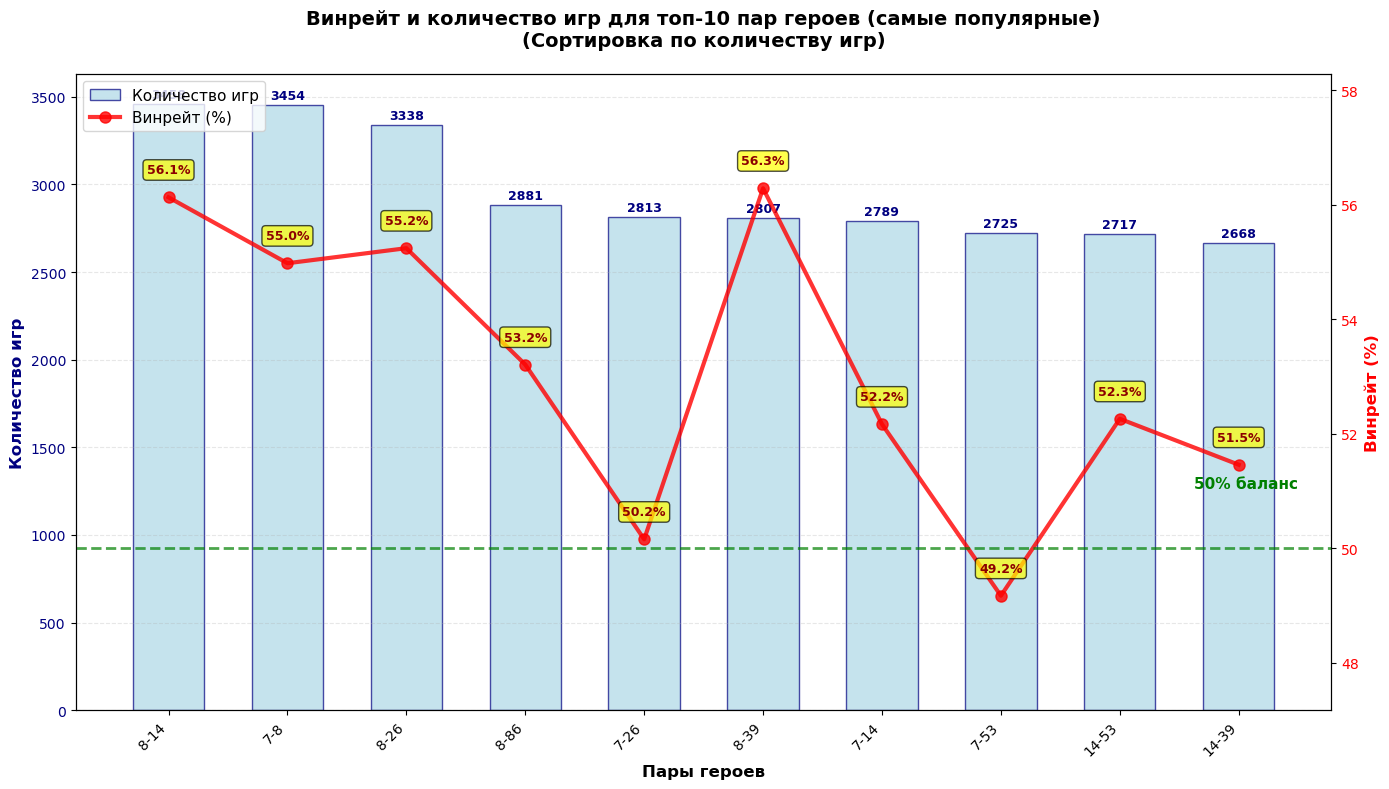


 ВИЗУАЛИЗАЦИЯ ПАР С ВЫСОКИМ ВИНРЕЙТОМ


C:\Users\Kshusha\AppData\Local\Temp\ipykernel_16800\2880820963.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


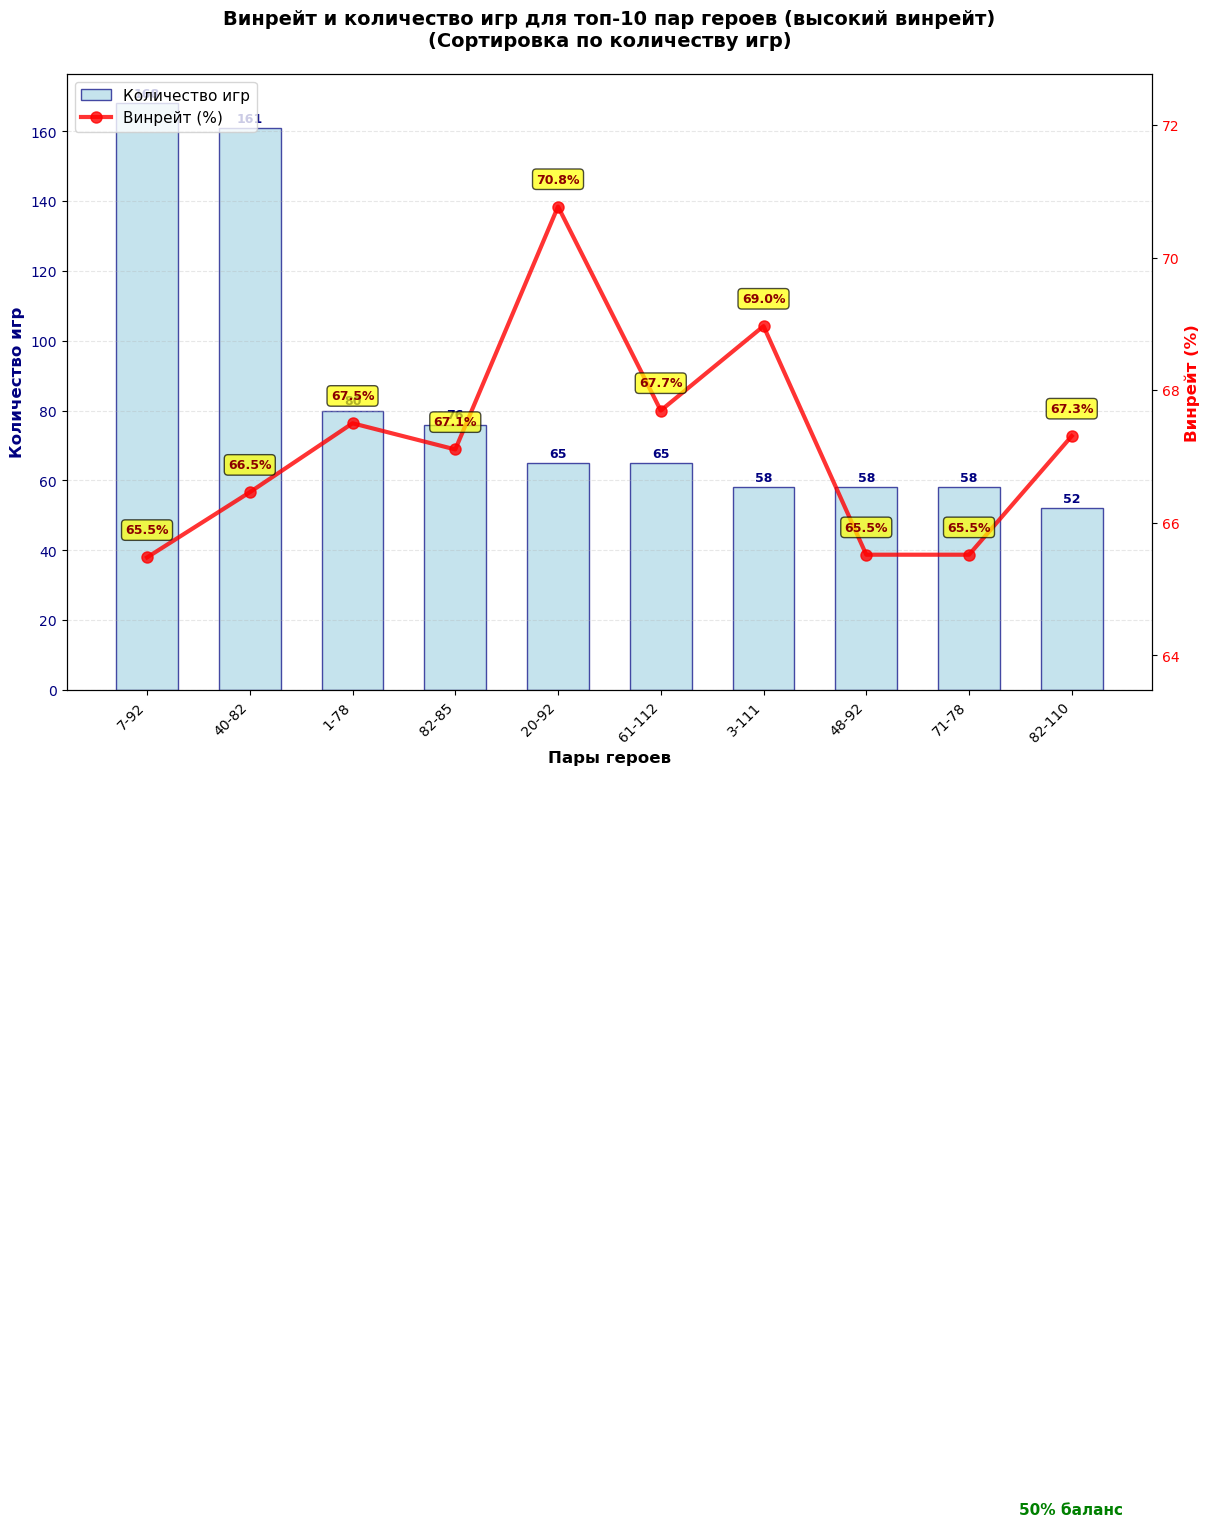

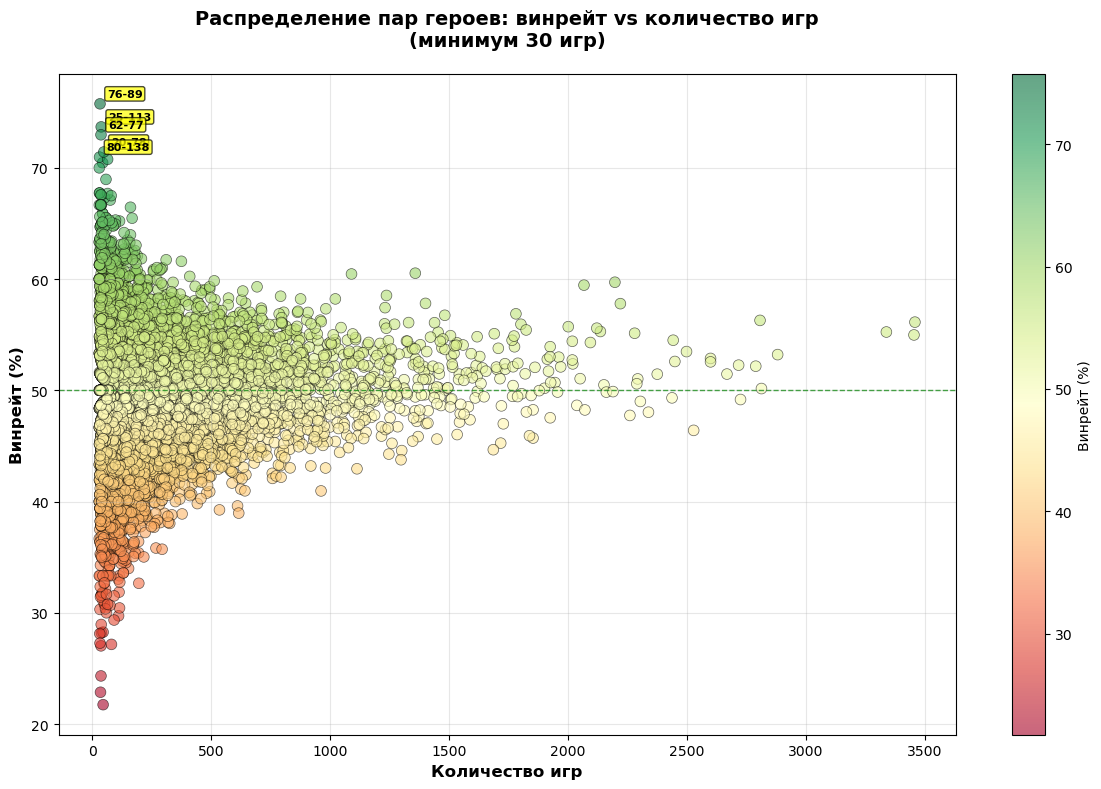

In [38]:
def visualize_pair_winrate_vs_games(pair_results, top_n=10, title_suffix="", figsize=(14, 8)):
    """
    Визуализирует винрейт и количество игр пар героев на одной диаграмме
    
    Parameters:
    pair_results (list): Список словарей с результатами пар
    top_n (int): Количество пар для отображения
    title_suffix (str): Дополнение к заголовку
    figsize (tuple): Размер фигуры
    """
    
    # Сортируем по количеству игр (популярности)
    plot_data = sorted(pair_results, key=lambda x: x['games'], reverse=True)[:top_n]
    
    # Создаем фигуру и оси
    fig, ax1 = plt.subplots(figsize=figsize)
    
    # Настройки для столбцов
    x_pos = np.arange(len(plot_data))
    width = 0.6
    
    # Подготавливаем подписи для пар
    pair_labels = [f"{pair[0]}-{pair[1]}" for pair in [item['pair'] for item in plot_data]]
    
    # Столбцы для количества игр (ось Y слева)
    bars = ax1.bar(x_pos, [item['games'] for item in plot_data], width, 
                   alpha=0.7, color='lightblue', edgecolor='navy', linewidth=1,
                   label='Количество игр')
    
    ax1.set_xlabel('Пары героев', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Количество игр', color='navy', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='navy')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(pair_labels, rotation=45, ha='right', fontsize=10)
    
    # Добавляем значения количества игр на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max([item['games'] for item in plot_data])*0.005,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, 
                color='navy', fontweight='bold')
    
    # Создаем вторую ось Y для винрейта (справа)
    ax2 = ax1.twinx()
    
    # Линия для винрейта
    winrates = [item['winrate'] for item in plot_data]
    line = ax2.plot(x_pos, winrates, 
                   'ro-', linewidth=3, markersize=8, 
                   label='Винрейт (%)', alpha=0.8)
    
    ax2.set_ylabel('Винрейт (%)', color='red', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim([max(0, min(winrates) - 2), 
                  min(100, max(winrates) + 2)])
    
    # Добавляем значения винрейта на точках
    for i, winrate in enumerate(winrates):
        ax2.annotate(f'{winrate:.1f}%', 
                    (x_pos[i], winrate),
                    xytext=(0, 15), textcoords='offset points',
                    ha='center', va='bottom', fontweight='bold', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.7),
                    color='darkred')
    
    # Добавляем горизонтальную линию на уровне 50% (баланс)
    ax2.axhline(y=50, color='green', linestyle='--', alpha=0.7, linewidth=2)
    ax2.text(len(plot_data) - 0.5, 51, '50% баланс', 
             ha='right', va='bottom', color='green', fontsize=11, fontweight='bold')
    
    # Объединяем легенды
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)
    
    # Заголовок и сетка
    plt.title(f'Винрейт и количество игр для топ-{top_n} пар героев{title_suffix}\n'
              f'(Сортировка по количеству игр)', 
              fontsize=14, fontweight='bold', pad=20)
    
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Настройки внешнего вида
    plt.tight_layout()
    
    # Выводим дополнительную информацию
    avg_winrate = np.mean(winrates)
    total_games = sum([item['games'] for item in plot_data])
    
    plt.show()

# Альтернативный вариант с горизонтальными столбцами
def visualize_pair_winrate_vs_games_horizontal(pair_results, top_n=10, title_suffix="", figsize=(14, 10)):
    """
    Горизонтальная версия визуализации винрейта и количества игр пар героев
    """
    
    # Сортируем по количеству игр
    plot_data = sorted(pair_results, key=lambda x: x['games'], ascending=True)[-top_n:]
    
    fig, ax1 = plt.subplots(figsize=figsize)
    
    y_pos = np.arange(len(plot_data))
    
    # Подготавливаем подписи для пар
    pair_labels = [f"{pair[0]}-{pair[1]}" for pair in [item['pair'] for item in plot_data]]
    
    # Горизонтальные столбцы для количества игр
    bars = ax1.barh(y_pos, [item['games'] for item in plot_data], 
                   alpha=0.7, color='lightblue', edgecolor='navy', linewidth=1,
                   label='Количество игр')
    
    ax1.set_ylabel('Пары героев', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Количество игр', color='navy', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='x', labelcolor='navy')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(pair_labels, fontsize=10)
    
    # Вторая ось для винрейта
    ax2 = ax1.twiny()
    
    winrates = [item['winrate'] for item in plot_data]
    
    # Точки для винрейта
    scatter = ax2.scatter(winrates, y_pos,
                         s=120, color='red', alpha=0.8, marker='D',
                         label='Винрейт (%)', edgecolors='black', linewidth=1.5)
    
    ax2.set_xlabel('Винрейт (%)', color='red', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='x', labelcolor='red')
    ax2.set_xlim([max(0, min(winrates) - 2), 
                  min(100, max(winrates) + 2)])
    
    # Вертикальная линия на уровне 50%
    ax2.axvline(x=50, color='green', linestyle='--', alpha=0.7, linewidth=2)
    ax2.text(50.5, len(plot_data) - 0.5, '50% баланс', 
             ha='left', va='top', color='green', fontsize=11, fontweight='bold')
    
    # Добавляем значения
    for i, (games, winrate) in enumerate(zip([item['games'] for item in plot_data], winrates)):
        ax1.text(games + max([item['games'] for item in plot_data])*0.005, i, 
                f'{int(games)}', va='center', fontsize=9, color='navy', fontweight='bold')
        ax2.text(winrate, i, f' {winrate:.1f}%', va='center', fontsize=9, 
                color='red', fontweight='bold', 
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.9, edgecolor='red'))
    
    plt.title(f'Винрейт и количество игр для топ-{top_n} пар героев{title_suffix}\n'
              f'(Сортировка по количеству игр)', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Легенда
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=11)
    
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

# Визуализация популярных пар
print("ВИЗУАЛИЗАЦИЯ ПОПУЛЯРНЫХ ПАР ГЕРОЕВ")
print("=" * 50)

# Визуализируем топ-15 самых популярных пар
visualize_pair_winrate_vs_games(results, top_n=10, title_suffix=" (самые популярные)")

# Визуализируем топ-15 пар по винрейту (минимум 50 игр)
print("\n ВИЗУАЛИЗАЦИЯ ПАР С ВЫСОКИМ ВИНРЕЙТОМ")
print("=" * 50)

visualize_pair_winrate_vs_games(high_winrate_pairs[:10], top_n=10, title_suffix=" (высокий винрейт)")

# Дополнительная функция для scatter plot
def visualize_pairs_scatter(pair_results, min_games=0, figsize=(12, 8)):
    """
    Scatter plot пар героев: винрейт vs количество игр
    """
    filtered_pairs = [pair for pair in pair_results if pair['games'] >= min_games]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    games = [pair['games'] for pair in filtered_pairs]
    winrates = [pair['winrate'] for pair in filtered_pairs]
    pairs = [f"{pair[0]}-{pair[1]}" for pair in [item['pair'] for item in filtered_pairs]]
    
    scatter = ax.scatter(games, winrates, alpha=0.6, s=60, c=winrates, 
                        cmap='RdYlGn', edgecolors='black', linewidth=0.5)
    
    ax.set_xlabel('Количество игр', fontsize=12, fontweight='bold')
    ax.set_ylabel('Винрейт (%)', fontsize=12, fontweight='bold')
    ax.set_title(f'Распределение пар героев: винрейт vs количество игр\n(минимум {min_games} игр)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(alpha=0.3)
    
    # Добавляем цветовую шкалу
    plt.colorbar(scatter, ax=ax, label='Винрейт (%)')
    
    # Добавляем линию баланса
    ax.axhline(y=50, color='green', linestyle='--', alpha=0.7, linewidth=1)
    
    # Подписываем несколько лучших пар
    top_pairs = sorted(filtered_pairs, key=lambda x: x['winrate'], reverse=True)[:5]
    for pair in top_pairs:
        idx = filtered_pairs.index(pair)
        ax.annotate(f"{pair['pair'][0]}-{pair['pair'][1]}", 
                   (games[idx], winrates[idx]),
                   xytext=(5, 5), textcoords='offset points',
                   fontweight='bold', fontsize=8,
                   bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.7))
    
    plt.tight_layout()
    plt.show()

# Scatter plot для всех пар с минимум 30 игр
visualize_pairs_scatter([{'pair': pair, 'games': stats['games'], 'winrate': (stats['wins']/stats['games']*100)} 
                        for pair, stats in pair_winrates.items() if stats['games'] >= 30], 
                       min_games=30)

## 5. Оценка гипотез

**H1 — Баланс в матчах:**  
Распределение выигрышей показывает, что системное преимущество сторон есть.

**H2 — Популярность героев:**  
Среди 25 самых популярных героев наблюдается ярко выраженный "длинный хвост", 
при этом винрейт популярных героев варьируется от 47% до 55 %.
Исследование наиболее эффективных героев выявило наличие героев с высоким винрейтом,  
но средней или низкой популярностью, что свидетельствует об относительной сбалансированности мета-игры. 

**H3 — Перекосы в распределении:**  
Наблюдаемые перекосы указывают на особенности, которые могут потребовать нормализации,  
стратификации или тщательной интерпретации.

## 6. Основные выводы

- Результаты матчей выглядят в целом сбалансированными, что указывает на отсутствие серьезных отклонений в сторону победителя.  
- Выбор героев осуществляется по принципу **"длинного хвоста"**, распространенному в соревновательных играх.
- Некоторые распределения являются **ненормальными**, что важно для последующего моделирования.